In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN


: 

In [50]:
def dbscan(X):
    algo = DBSCAN(eps=0.6, min_samples=4)
    clusters = algo.fit_predict(X)
    return clusters

In [53]:
def plot_cluster_assignments(X, clusters):
    sns.set(style='darkgrid')

    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,10))

    for i in np.unique(clusters):
        bool_arr = (clusters == i)

        label = 'Outlier' if i==-1 else 'Cluster ' + str(i+1)

        sns.scatterplot(x=X[bool_arr,0], y=X[bool_arr,1],
            label=label, ax=ax[0,0])
        sns.scatterplot(x=X[bool_arr,2], y=X[bool_arr,3],
            label=label, ax=ax[0,1])
        sns.scatterplot(x=X[bool_arr,0], y=X[bool_arr,2],
            label=label, ax=ax[1,0])
        sns.scatterplot(x=X[bool_arr,1], y=X[bool_arr,3],
            label=label, ax=ax[1,1])

    ax[0,0].set_xlabel('SepalLengthCm')
    ax[0,0].set_ylabel('SepalWidthCm')
    ax[0,0].set_title('Clustering (View 1)')

    ax[0,1].set_xlabel('PetalLengthCm')
    ax[0,1].set_ylabel('PetalWidthCm')
    ax[0,1].set_title('Clustering (View 2)')

    ax[1,0].set_xlabel('SepalLengthCm')
    ax[1,0].set_ylabel('PetalLengthCm')
    ax[1,0].set_title('Clustering (View 3)')

    ax[1,1].set_xlabel('SepalWidthCm')
    ax[1,1].set_ylabel('PetalWidthCm')
    ax[1,1].set_title('Clustering (View 4)')

    plt.tight_layout(pad=3)
    fig.suptitle(t='Clustering Results')
    plt.show()

In [57]:
'''
Plot cluster-assignments in 3D.
'''
def plot3d_cluster_assignments(X, clusters):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')

    for i in np.unique(clusters):
        ax.scatter(xs=X[clusters==i,0], 
            ys=X[clusters==i,1],
            zs=X[clusters==i,2],
            label='Cluster ' + str(i+1))
            
    ax.set_xlabel('SepalLengthCm')		
    ax.set_ylabel('SepalWidthCm')		
    ax.set_zlabel('PetalLengthCm')

    ax.set_title('3D View of DBSCAN Clustering Results')
    plt.legend()
    plt.show()		


      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

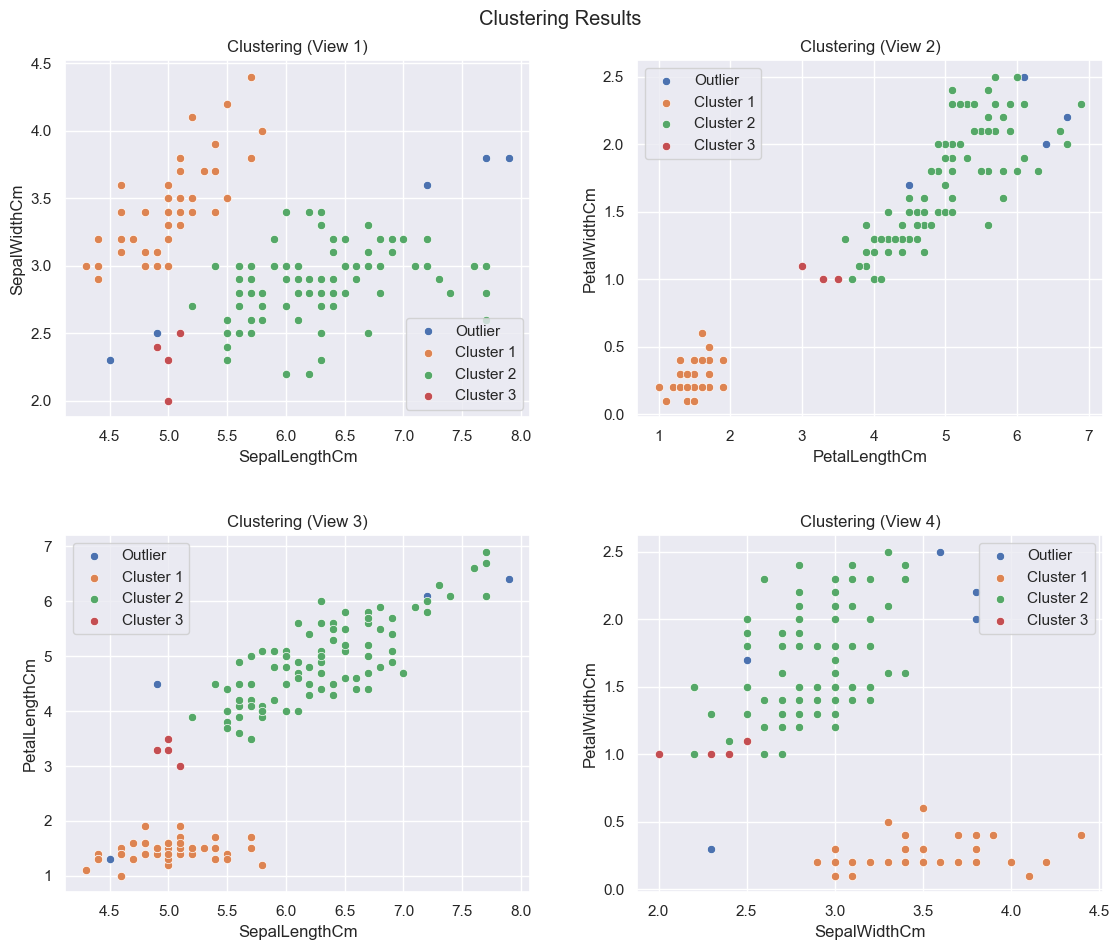

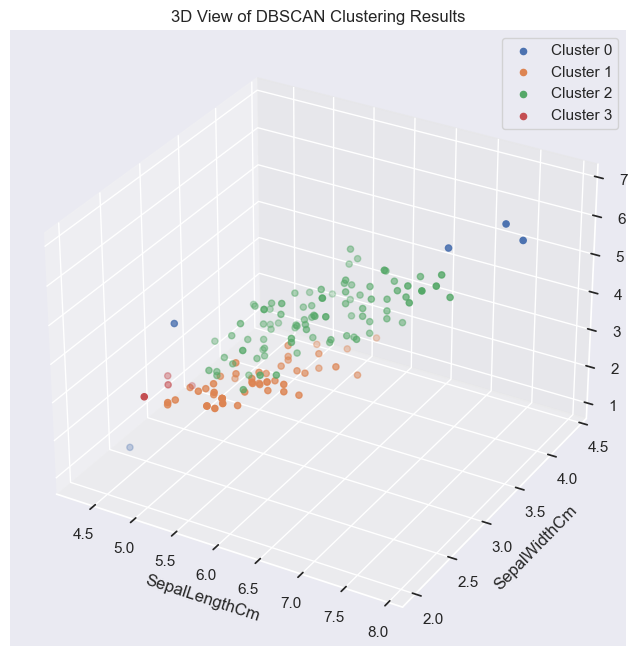

In [58]:
'''
Main Program
'''

# read dataset into a Pandas DataFrame
df = pd.read_csv('../iris.csv')
print(df)

# getting rows of data between these two column-names
X = df.loc[:,'SepalLengthCm':'PetalWidthCm']
X = X.values   # converting Pandas DataFrame to NumPy array

# use DBSCAN to perform clustering
clusters = dbscan(X=X)
print(clusters)

# plot clustering results
plot_cluster_assignments(X=X, clusters=clusters)

# plot clustering results in 3D
plot3d_cluster_assignments(X=X, clusters=clusters)